##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: Everybody
- Performed math exercises: Everybody
- Performed programming exercises: Everybody
- Contributed to the overall final assignment: Everybody

Everybody did the assignment themselves and we voted afterwards for the one version to submit.

# Chapter 8
## Hopfield networks

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).

Learning goals:
1. Get familiar with energy functions and with updating Hopfield networks by hand
1. Implement a Hopfield network that fulfills a constraint
1. Implement, train and test a Hopfield network on images

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import urllib
import skimage as ski
from skimage import transform

### Exercise 1: Flip-flop  (2 points)
Consider a Hopfield network consisting of two binary variables $x_1$ and $x_2$ with biases $\theta_1 = 0.5$ and $\theta_2 = 0.5$, and weights $w_{ij} = -1$. This network implements a so-called flip-flop. 
1. What is the energy function of this network? *(Write down the standard form of $E(\mathbf{x})$, insert the values and simplify it.)*
1. What are the possible energy levels of this network? *(Given the possible state combinations for $x_1$ and $x_2$ in a Hopfield network, which values can $E(\mathbf{x})$ have?)*
1. What are the stable states of this network?

### Solution 1
1. $E(x) = - \dfrac{1}{2}\sum_{i,j}w_{i,j}x_ix_j-\sum_{i}\theta_ix_i$  
   
   $E(x)= - \dfrac{1}{2}((-1*x_1*x_2)+(-1*x_2*x_1))-(0.5*x_1 + 0.5*x_2)$    
   
   $E(x) = x_1x_2-0.5x_1-0.5x_2$

2. $x=[0,0]: E(x) = 0$
   
   $x=[0,1]: E(x) = -.5$

   $x=[1,0]: E(x) = -.5$

   $x=[1,1]: E(x) = 0$

3. The two stable states are x being [0,1] and x being [1,0], since they both have the energy minimum.

### Exercise 2: Hopfield net
Consider a Hopfield network with weights
\begin{equation}
\mathbf{W} =
\left[
\begin{array}{llll}
0 & -0.2 & -0.4 & 0\\
-0.2 & 0 & 0.5 & 0.3\\
-0.4 & 0.5 & 0 & 0.8\\
0 & 0.3 & 0.8 & 0
\end{array}
\right]
\end{equation}
and biases
$\boldsymbol{\theta} = (-0.5,-0.3,-0.8,0.2)$.
1. What is the state of the Hopfield network after one sequential update of the first, second, third and fourth node when we start at the initial node state $\mathbf{x} = (0,1,1,1)$? 
1. What do you conclude from your observation?

### Solution 2  (1 point)
1. \begin{equation}
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]
\rightarrow^1
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]
\rightarrow^2
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]
\rightarrow^3
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]
\rightarrow^4
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]
\end{equation}

1. I conclude from the updates that $
\left[
\begin{array}{llll}
0 & 1 & 1 & 1\\
\end{array}
\right]$ 
is a stable state in this network.

### Exercise 3 : A Hopfield network that fulfills a constraint (2 points)

In this exercise you will run a Hopfield model that converges to a state that fulfills a constraint. 

1. Implement a function `optimize(n)` which returns a length `n` vector of node states. The constraint it should solve is that all nodes should be set to `0`, except for a single random node set to `1`.
1. Show that your function works for different values of `n`.

Start from random node states. Choose and implement the necessary weights and biases manually (i.e. you do not train the Hopfield network here). The resulting vector should be the configuration of the network when it has converged to a stable state. Make sure that your implementation fulfills all requirements for Hopfield networks to converge to stable states.

### Solution 3

In [ ]:
# The optimization function
def optimize(n):
  nodes = np.random.randint(0,2,(n))
  while nodes.sum()!=1:
    updatenode = np.random.randint(0,n)
    a = 1
    for node in range(n):
      if node != updatenode:
        a += (-2) * nodes[node]
    if a >= 0:
      nodes[updatenode] = 1
    else:
      nodes[updatenode] = 0
  return nodes

In [ ]:
# Print solutions
print(optimize(1))
print(optimize(20))
print(optimize(200))
print(optimize(999))

[1]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

### Training a Hopfield network on given patterns

You will now implement a Hopfield network that learns to reconstruct given images. Here you can *a) ignore the bias term*; and *b) use bipolar nodes*. 

The next cells load an image, resize it and store it together with a mirrored version of the same image in the variables `x1` and `x2`, which will be stacked in the training data `X`. These are your *input patterns*. 

In [ ]:
# The source image
f = urllib.request.urlopen("https://homepages.cae.wisc.edu/~ece533/images/watch.png")

# Read the image
x1 = mpimg.imread(f)
x1 = transform.resize(x1, (76, 102), mode="reflect", anti_aliasing=True)

# Make 2D and bipolar
x1 = np.mean(x1, axis=2)
x1[x1 < np.mean(x1.flatten())] = -1 # Black
x1[x1 >= np.mean(x1.flatten())] = 1 # White
x1.astype("int32")

# Make duplicate but mirrored second image
x2 = np.fliplr(x1)

# Flatten images
sz = x1.shape
X = np.stack((x1.flatten(), x2.flatten()), axis=1)

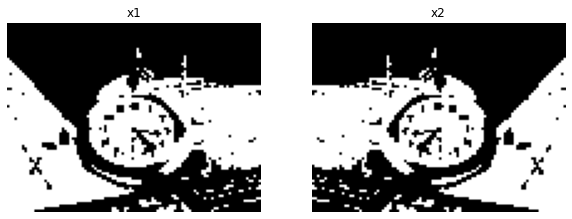

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0].axis('off')
ax[0].set_title("x1")

ax[1].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1].axis('off')
ax[1].set_title("x2")
pass

### Exercise 4: Hopfield training  (1 point)
Write a function `hopfield_train(X)` which takes the $n$ *input patterns* `X` (shape $(m,n)$) as argument and returns the weight matrix `w` for a trained Hopfield network with $m$ nodes. Initialize the weights with zeros and then implement the learning rule for the weights. Again, make sure that your network fulfills the requirements for Hopfield network convergence. 

Note that you can write the weight update term per *input pattern* in a single line using the dot product. 

### Solution 4

In [ ]:
# Hopfield training
# X = [M N]
# W = [M M]
def hopfield_train(X):
    m, n = X.shape

    # Initialize weights
    w = np.zeros((m,m))
                  
    # Hebbian learning
    w += np.tensordot(X, X, (1,1))
    
    # Avoid self-connections (diagonal)
    np.fill_diagonal(w, 0)
    return w

### Exercise 5  (1 points)
Write a function `hopfield_test(X, w, n_epochs)` which takes the $n$ initial states `X` (shape $(m,n)$) and the learned weights `w` and updates all units in random order for `n_epochs` times (i.e., which "runs" your trained Hopfield network for `n_epochs` rounds). The return value should be the updated states of the Hopfield network. Make sure that your iteration fulfills the requirements for Hopfield network convergence.

### Solution 5

In [ ]:
# Hopfield testing
def hopfield_test(X, w, n_epochs=10):
    m, n = X.shape
    Y = np.zeros_like(X)
    # Loop over epochs
    for e in range(n_epochs):
        # Loop over examples
        for p in range(n):
            units = X[:, p]
            # Loop over nodes
            nodes = np.array(range(units.shape[0]))
            np.random.shuffle(nodes)
            for i in nodes:
                # Update node
                a = w[i] * units
                a = a.sum()
                units[i] = np.sign(a)
            Y[:, p] = units
    return Y

### Exercise 6  (1 points)
Train your hopfield network on the two *input patterns* in `X` and save the weights. 

### Solution 6

In [ ]:
# Run hopfield training
w = hopfield_train(X)

### Exercise 7 (2 points)

Test whether your trained Hopfield net can reconstruct the original images when starting from different degrees of corruption (which means randomly changing the pattern's node states). Make use of the function `corrupt_images` for this. 

1. Choose 4 degrees of corruption (between min: 10%, max: 100%) you want to test. Corrupt the original input images in `X` accordingly.  
1. Run your trained Hopfield network with the corrupted images as input. It may not need to run for long time. 
1. For both patterns show the original, the corrupted and the reconstructed images next to each other. 
1. For each of the degrees of corruption, comment on what you see. 

In [ ]:
def corrupt_images(X, percentage=25):
    Xhat = X.copy()
    n_pixels = int(X.shape[0] * percentage / 100)
    for i_example in range(X.shape[1]):
        idx = np.random.permutation(X.shape[0])[:n_pixels]
        Xhat[idx, i_example] = 2 * np.random.randint(0, 2, n_pixels) - 1
    return Xhat

### Solution 7

In [ ]:
def show_images(images, title):
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))
  ax[0].imshow(images[:, 0].reshape(sz), cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("x1")
  ax[1].imshow(images[:, 1].reshape(sz), cmap="gray")
  ax[1].axis('off')
  ax[1].set_title("x2")
  fig.suptitle(title, fontsize=16,va='top')
  pass

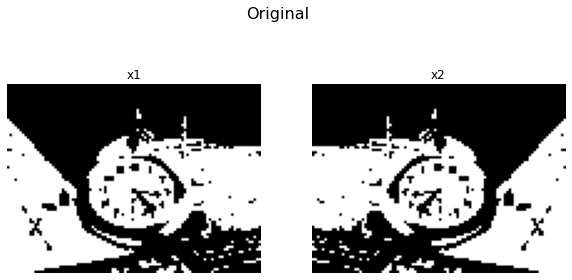

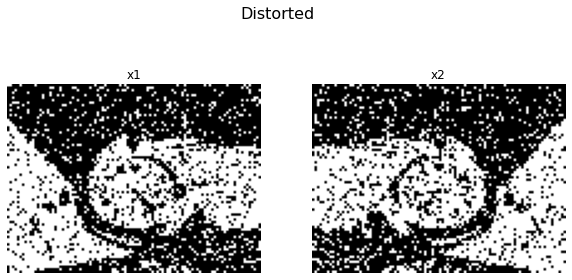

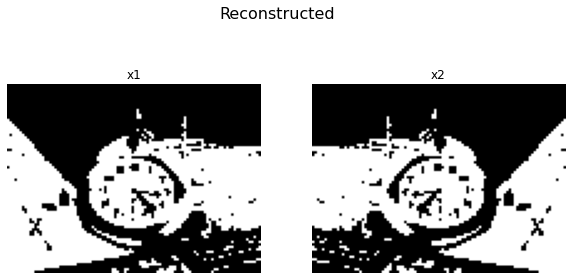

In [ ]:
# Original
show_images(X, "Original")
# Corrupt images
X25 = corrupt_images(X)
show_images(X25, "Distorted")

# Test associative memory properties
X25_recon = hopfield_test(X25, w, n_epochs=10)

# Plot results
show_images(X25_recon, "Reconstructed")

We can clearly see that the network was able to recreate the images with 25 percent corruption.

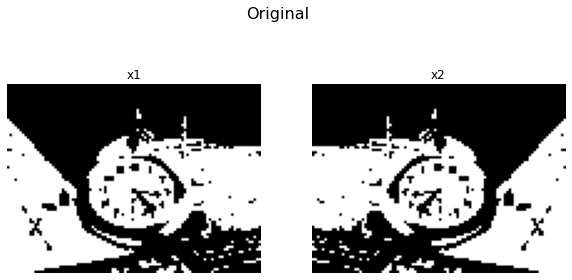

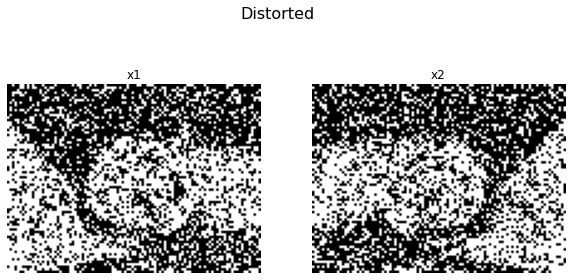

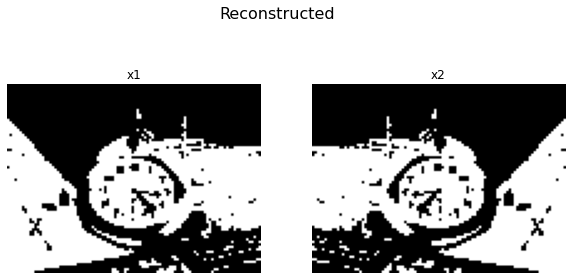

In [ ]:
# Original
show_images(X, "Original")
# Corrupt images
X50 = corrupt_images(X, percentage=50)
show_images(X50, "Distorted")

# Test associative memory properties
X50_recon = hopfield_test(X50, w, n_epochs=10)

# Plot results
show_images(X50_recon, "Reconstructed")

We can clearly see that the network was able to recreate the images with 50 percent corruption.


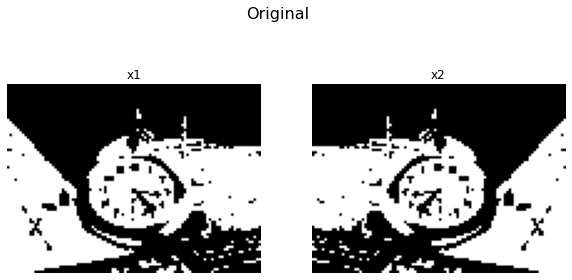

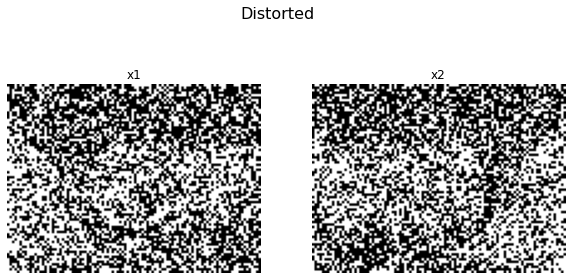

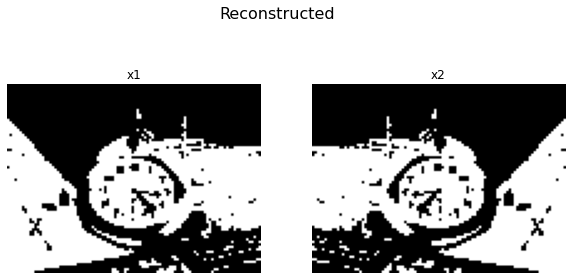

In [ ]:
# Original
show_images(X, "Original")
# Corrupt images
X75 = corrupt_images(X, percentage=75)
show_images(X75, "Distorted")

# Test associative memory properties
X75_recon = hopfield_test(X75, w, n_epochs=10)

# Plot results
show_images(X75_recon, "Reconstructed")

We can clearly see that the network was able to recreate the images with 75 percent corruption, even though my brain couldn't.


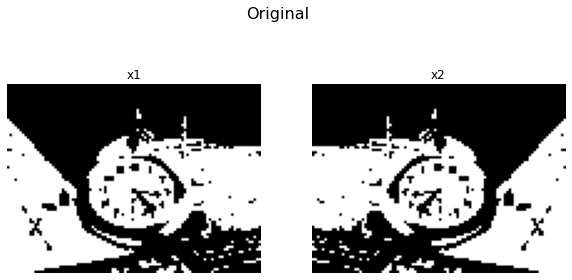

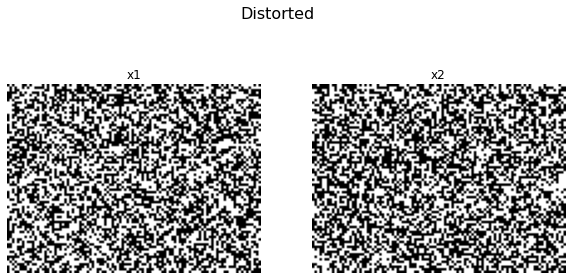

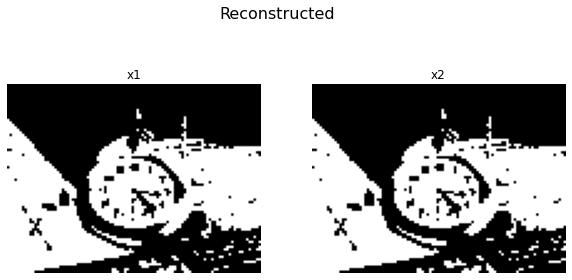

In [ ]:
# Original
show_images(X, "Original")
# Corrupt images
X100 = corrupt_images(X, percentage=100)
show_images(X100, "Distorted")

# Test associative memory properties
X100_recon = hopfield_test(X100, w, n_epochs=10)

# Plot results
show_images(X100_recon, "Reconstructed")

Interestingly the behaviour with 100 percent corruption is kind of random. Sometimes the results look fine, just like the input, sometimes the black and the white pixels have switched to the other color. And sometimes, it even reconstructed the wrong picture. It might be that the corruption function at one hundred percent might sometimes not change one pixel, while changing other pixels twice, which results in two pixels still having their original state, thus preserving the image somewhat. Or it could be that random pixel arrays will also converge to either one learned pattern.

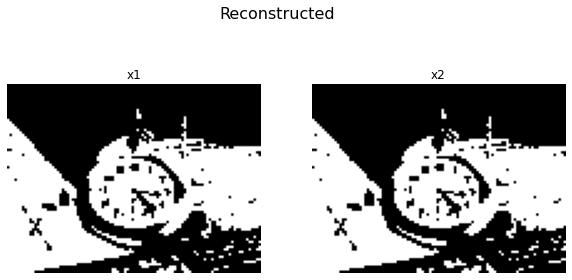

In [ ]:

# Test associative memory properties
noise = np.random.randint(0,2,X.shape)
noise[noise==0] = -1
noise_recon = hopfield_test(noise, w, n_epochs=10)

# Plot results
show_images(X100_recon, "Reconstructed")

Indeed the reconstruction from a random vector also converges to the learned patterns, with sometimes displaying the colorflip discussed above.